In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style()
sns.set_theme()

In [7]:
#Reading Data

In [8]:
data=pd.read_csv('Crop_recommendation.csv')

In [9]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [11]:
#Describing data

In [12]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
#printing different predictive label

In [14]:
print("Different Crops",)
print("="*100)
for i in data['label'].unique():
    print(i)

Different Crops
rice
maize
chickpea
kidneybeans
pigeonpeas
mothbeans
mungbean
blackgram
lentil
pomegranate
banana
mango
grapes
watermelon
muskmelon
apple
orange
papaya
coconut
cotton
jute
coffee


# Visualisation

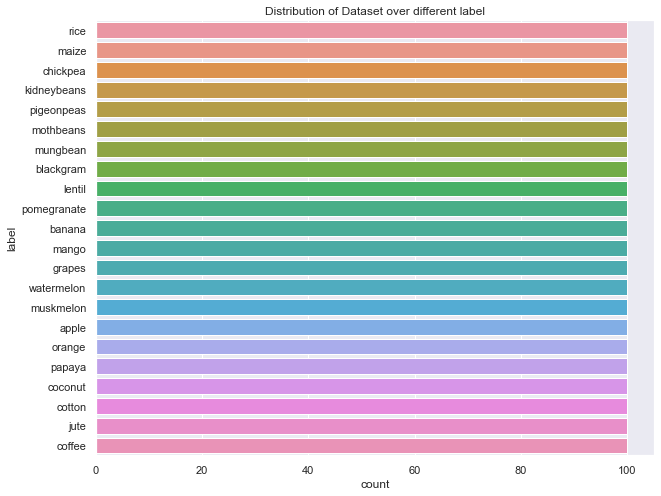

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(y=data['label'])
plt.title("Distribution of Dataset over different label")
plt.savefig('Distribution of Target variable.png')

In [16]:
def dist_plot(x,title):
    plt.figure()
    sns.distplot(x)
    plt.title(title)

Distribution of Each independent variable 


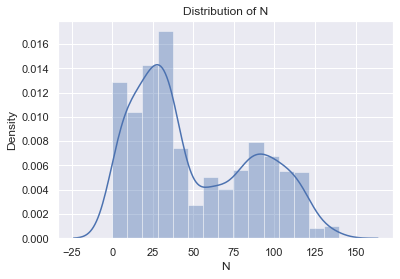

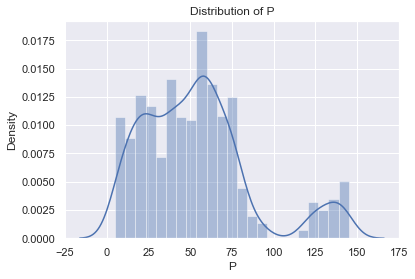

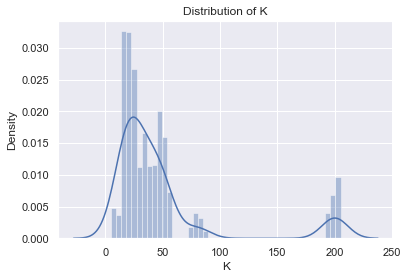

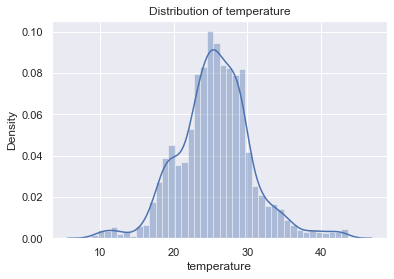

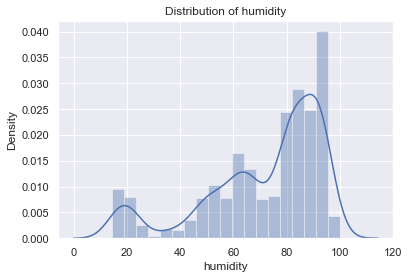

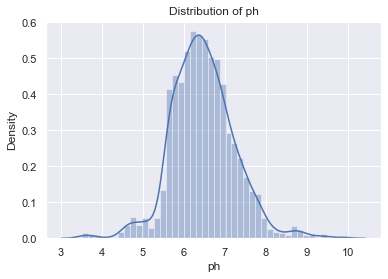

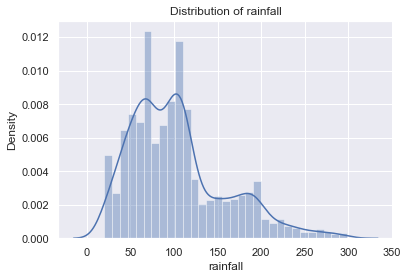

In [58]:
print("Distribution of Each independent variable ")
print("="*100)
for i in data.columns:
    if i!='label':
        dist_plot(data[i],"Distribution of "+i)
        plt.savefig('foo'+i+'.jpg')

In [18]:
def boxplot(x,title):
    plt.figure()
    sns.boxplot(x)
    plt.title(title)

Boxplot of Each independent variable 


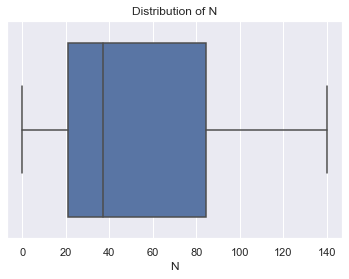

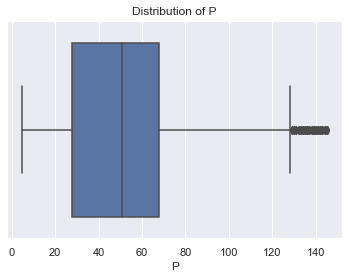

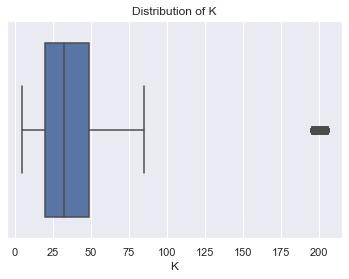

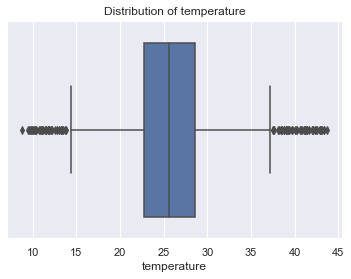

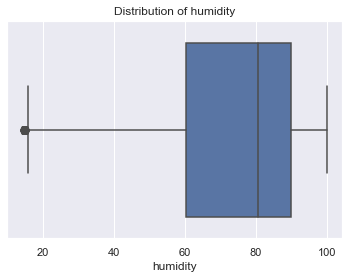

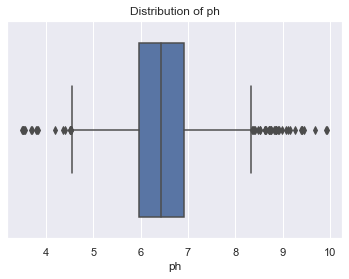

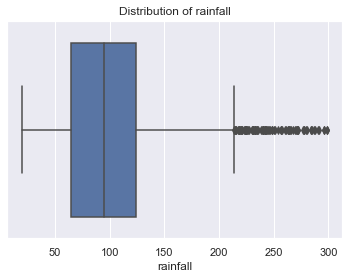

In [19]:
print("Boxplot of Each independent variable ")
print("="*100)
for i in data.columns:
    if i!='label':
        boxplot(data[i],"Distribution of "+i)

In [20]:
def scatterplot(x,title):
    plt.figure()
    sns.relplot(x,data['label'])
    plt.title(title)

Scatterplot of Each independent variable 


<Figure size 432x288 with 0 Axes>

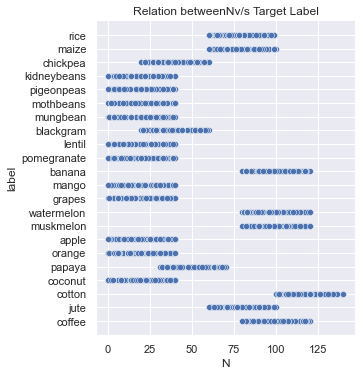

<Figure size 432x288 with 0 Axes>

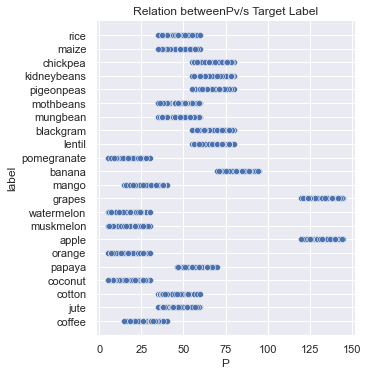

<Figure size 432x288 with 0 Axes>

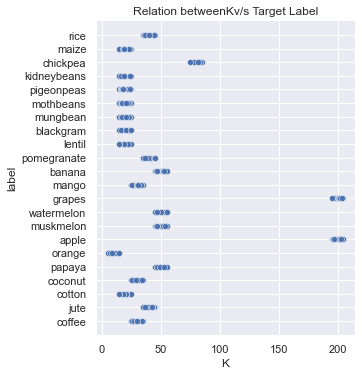

<Figure size 432x288 with 0 Axes>

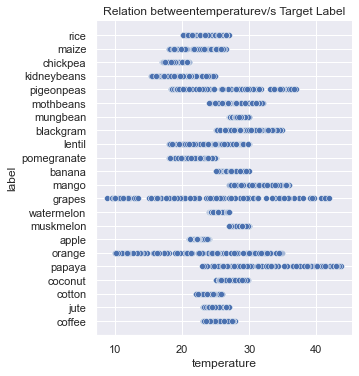

<Figure size 432x288 with 0 Axes>

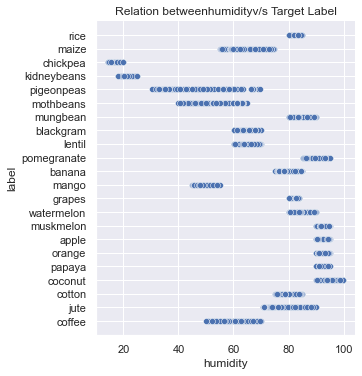

<Figure size 432x288 with 0 Axes>

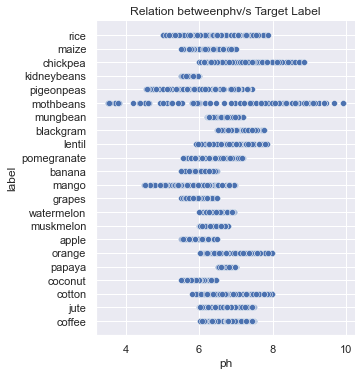

<Figure size 432x288 with 0 Axes>

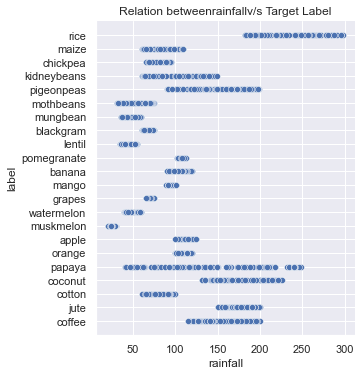

In [54]:
print("Scatterplot of Each independent variable ")
print("="*100)
for i in data.columns:
    if i!='label':
        scatterplot(data[i],"Relation between"+i+"v/s Target Label")
        plt.savefig("Relation between "+i+"vs Target Label"+'.jpg')

In [22]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Modelling


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [24]:
#spliting data into train and test

In [25]:
X=data[["N","P","K","temperature","humidity","ph","rainfall"]]
y=data["label"]

In [26]:
X.head(),y.tail()

(    N   P   K  temperature   humidity        ph    rainfall
 0  90  42  43    20.879744  82.002744  6.502985  202.935536
 1  85  58  41    21.770462  80.319644  7.038096  226.655537
 2  60  55  44    23.004459  82.320763  7.840207  263.964248
 3  74  35  40    26.491096  80.158363  6.980401  242.864034
 4  78  42  42    20.130175  81.604873  7.628473  262.717340,
 2195    coffee
 2196    coffee
 2197    coffee
 2198    coffee
 2199    coffee
 Name: label, dtype: object)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)

# Creating Pipeline with different algorithms:-
    1) LogisticRegression
    2) GaussianNB
    3) SVC
    4) DecisionTreeClassifier
    5) RandomForestClassifier
    6) BaggingClassifier
    7) AdaBoost Classifier
    8) GradientBoostingClassifier
    9) ExtraTreesClassifier

In [28]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [29]:
pipeline_GNB=Pipeline([('scalar2',StandardScaler()),
                     ('GNB',GaussianNB())])

In [30]:
pipeline_SVC=Pipeline([('scalar3',StandardScaler()),
                     ('SVC',SVC())])

In [31]:
pipeline_DTC=Pipeline([('scalar4',StandardScaler()),
                     ('DTC',DecisionTreeClassifier())])

In [32]:
pipeline_RFC=Pipeline([('scalar5',StandardScaler()),
                     ('RFC',RandomForestClassifier())])

In [33]:
pipeline_BC=Pipeline([('scalar6',StandardScaler()),
                     ('BC',BaggingClassifier())])

In [34]:
pipeline_ada=Pipeline([('scalar7',StandardScaler()),
                     ('Ada',AdaBoostClassifier())])

In [35]:
pipeline_GBC=Pipeline([('scalar8',StandardScaler()),
                     ('GBC',GradientBoostingClassifier())])

In [36]:
pipeline_ETC=Pipeline([('scalar9',StandardScaler()),
                     ('ETC',ExtraTreesClassifier())])

In [37]:
pipelines = [pipeline_lr, pipeline_GNB,pipeline_SVC,pipeline_DTC,pipeline_RFC,pipeline_BC,pipeline_ada,pipeline_GBC,pipeline_ETC]

In [38]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [39]:
pipe_dict = {0: 'Logistic Regression', 
             1: 'GuassianNaive Bayes',
             2:'Support Vector Machine',
            3:'Decision Tree Classifier',
            4:'Random Forest Classifier',
            5:'Bagging Classifier',
            6:'AdaBoost Classifier',
            7:'Gradient Boosting Classifier',
            8:'Extra Tree Classifier'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [40]:
accuracy=[]
model_name=[]

## Storing model accuracy

In [41]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    model_name.append(pipe_dict[i])
    accuracy.append(model.score(X_test,y_test))

Logistic Regression Test Accuracy: 0.9704545454545455
GuassianNaive Bayes Test Accuracy: 0.9954545454545455
Support Vector Machine Test Accuracy: 0.9795454545454545
Decision Tree Classifier Test Accuracy: 0.9772727272727273
Random Forest Classifier Test Accuracy: 0.9954545454545455
Bagging Classifier Test Accuracy: 0.9863636363636363
AdaBoost Classifier Test Accuracy: 0.15
Gradient Boosting Classifier Test Accuracy: 0.9840909090909091
Extra Tree Classifier Test Accuracy: 0.9954545454545455


In [42]:
# Plotting accuracy of each model

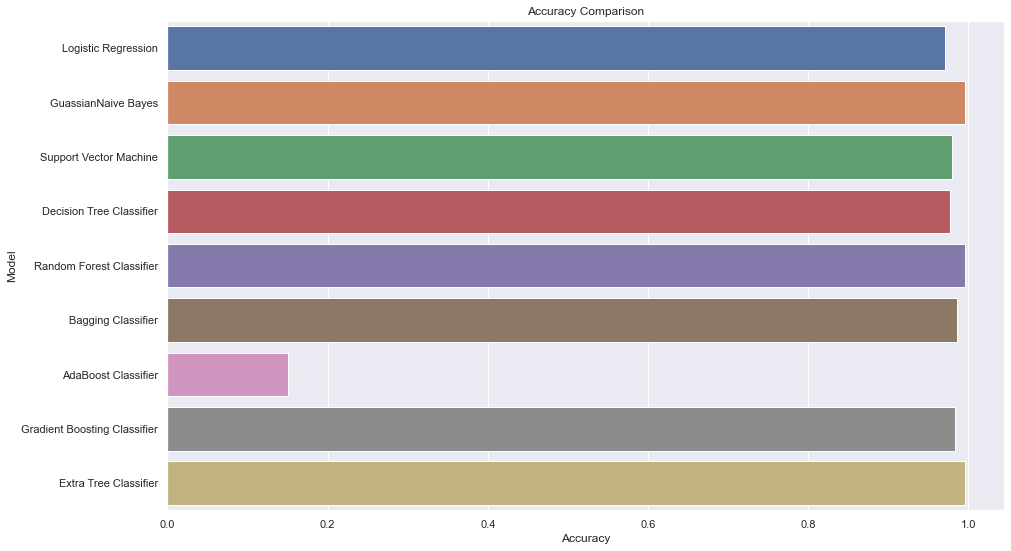

In [57]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = accuracy, y=model_name)
plt.savefig('accuracy.jpg')
plt.show()


In [44]:
#RandomForest Classifier is Selected
print("{} Test Accuracy: {}".format(pipe_dict[4],model.score(X_test,y_test)*100)+"%")

Random Forest Classifier Test Accuracy: 99.54545454545455%


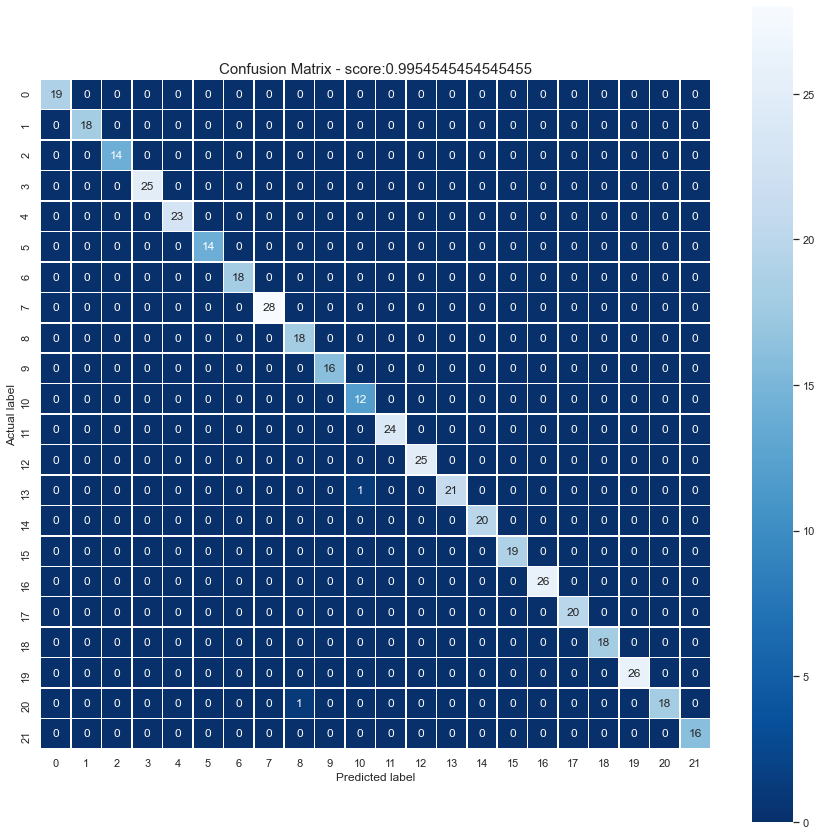

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        14
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        23
      coffee       1.00      1.00      1.00        14
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        28
        jute       0.95      1.00      0.97        18
 kidneybeans       1.00      1.00      1.00        16
      lentil       0.92      1.00      0.96        12
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        25
   mothbeans       1.00      0.95      0.98        22
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        26
      papaya       1.00    

In [45]:
model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [46]:
#import pickle
#pickle.dump(model, open("Recommender.pkl", 'wb'))

In [47]:
y_pred=model.predict([[117,32,34,26.272418,52.127394,6.758793,127.175293]])

In [48]:
y_pred

array(['coffee'], dtype=object)